# Exploratory Data Analysis (EDA)

## Import packages and modules

In [59]:
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Run necessary scripts

In [16]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/07_CreditCardFraud/data_prep

Number of rows in data_raw: 1000000
Number of columns in data_raw: 8
Number of Missing values: 0
1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

1.0    650552
0.0    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



## EDA

Note that each row corresponds to a financial transaction.

In [116]:
data_eda = data_raw

In [117]:
display(data_eda.describe())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


- The following columns are binary: repeat_retailer, used_chip, used_pin_number,	online_order, fraud.
- The other three (first) columns are numeric.

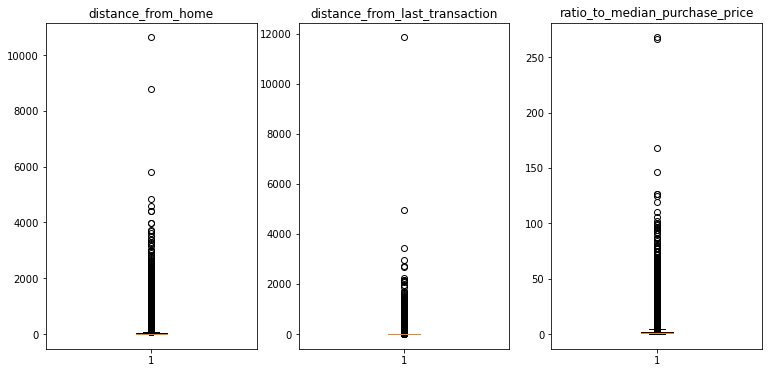

In [118]:
# Plot distributions of non-bonary features
cols1 = [data_eda.columns]
cols = data_eda.columns.tolist()

plt.figure(figsize=(40, 6))
for i in range(3):
    plt.subplot(1, 9, i+1)
    plt.boxplot(np.array(data_eda[cols[i]]))
    plt.title(cols[i])
plt.show()

- The numeric variables all seem to have some outliers, which could make sense given the context - especially in relation to predicting fraud transactions. As such they will be left in. 

<AxesSubplot:>

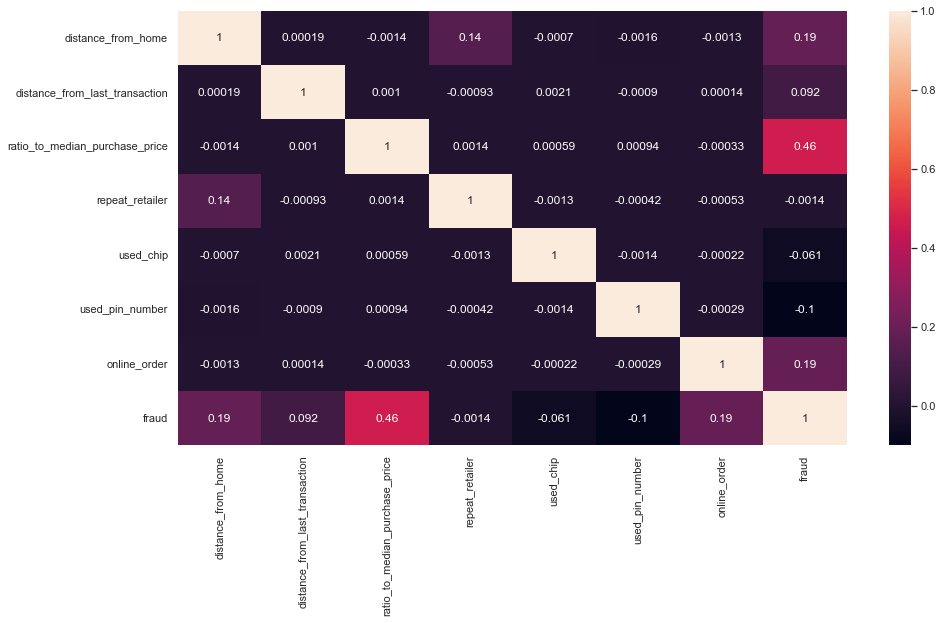

In [123]:
cm = data_eda[cols].corr().values
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm,annot=True, xticklabels = cols, yticklabels = cols)

- Looking at the above correlation matrix heat map, it seems that the variables with the highest correlation seem to be fraud and the ratio of the transaction to the median purchase price of the credit card owner (ratio_to_median_purchase_price). This may indicate that this ratio will have a higher predicting power for fraud compared to the other variables.  
- There do not seem to be any other strong signs of correlation, which for now indicates that we don't need to worry about multi-collinearity. 